# ¡Analisis de clientes y lo mas comprado!

## Plan de solución

importaremos pandas para poder leer sin problema los diversos datasets gracias al comando "pd.read_csv(", a cada uno le asignaremos un un nombre diferente para despues poder presentar la info de c/u por separado y visualizar que tipo de datos hay un común en cada conjunto de datos para ocupar en los siguientes ejercicios.


In [1]:
import pandas as pd 

In [2]:
orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('datasets/products.csv', sep=';')
aisles = pd.read_csv('datasets/aisles.csv', sep=';')
departments = pd.read_csv('datasets/departments.csv', sep=';')
order_products = pd.read_csv('datasets/order_products.csv', sep=';')
                 

In [3]:
orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones PT.1

Por lo que observe en los diferentes conjuntos de datos, la mayoria podriamos llamarlos/usarlos sin tener que hacer cambios significativos aunque aun hay que depurar los inexistentes y duplicados.


## Encontrar y eliminar los valores duplicados .

### `orders` data frame

In [8]:
dup_orders = orders[orders.duplicated()]
print(dup_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Encontre linea duplicadas, tienen en común la hora y el dia que es el miercoles a las 2:00 am y son 15 valores duplicados

In [9]:
miercoles_2am = orders[(orders['order_dow'] == 3) & 
                               (orders['order_hour_of_day'] == 2)]
print(f"Número total de pedidos el miércoles a las 2:00 a.m: {len(miercoles_2am)}")

Número total de pedidos el miércoles a las 2:00 a.m: 121


esto nos ayudo a saber que se hicieron 121 pedidos duplicados en la madrugada del miercoles. Procedere a eliminarlos

In [10]:
orders_limpio = dup_orders.drop_duplicates()
print(orders_limpio)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [11]:
print(orders_limpio.duplicated().sum())# Vuelve a verificar si hay filas duplicadas


0


In [12]:
print(orders_limpio['order_id'].nunique())# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


15


 Descubri que teniamos 15 pedidos duplicados el miercoles a las dos de la mañana, los eliminamos para tener datos real y limpios que no afecten en nuestro calculo a futuro 

### `products` data frame

In [13]:
print(products.duplicated().sum())# Verifica si hay filas totalmente duplicadas


0


In [14]:
print(products[products.duplicated(subset=['product_id'], keep=False)])# Revisa únicamente si hay ID de productos duplicados


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
productos_duplicados = products[products["product_name"].str.upper().duplicated()]
print(productos_duplicados)


       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [16]:
print(products[products['product_name'].duplicated()])

       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]


En este data frame no hubo datos duplicados desde la primera interacción pero para no cometer errores checamos mas afondo el nombre de los productos para ver si no habia duplicados ahi, la fila mencionada las pusimos en mayusculas para que fuera más facil que botara algún nombre duplicado pero no fue el caso,  no tenia nombres duplicados.

### `departments` data frame

In [17]:
departments[departments.duplicated()]

,department_id,department


In [18]:
departments[departments.duplicated(subset=['department_id'],keep=False)]

,department_id,department


Sin datos duplicados en estos datos, esta limpio.

### `aisles` data frame

In [19]:
aisles[aisles.duplicated()]# Revisa si hay filas totalmente duplicadas

,aisle_id,aisle


In [20]:
aisles[aisles.duplicated(subset=['aisle_id'])]# Revisa únicamente si hay IDs duplicadas de pasillos

,aisle_id,aisle


Al igual que el data frame anterios este no presenta datos duplicados. 

### `order_products` data frame

In [21]:
order_products[order_products.duplicated()]# Revisa si hay filas totalmente duplicadas


,order_id,product_id,add_to_cart_order,reordered


In [22]:
order_products_clean = order_products[order_products.duplicated(subset=['order_id', 'product_id'])] # Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products_clean)


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


 Despues de buscar valores duplicados en la lista "order_products" y no encontrar ninguno estamos listos para continuar con nuestra limpieza de datos

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
na_products = products[products['product_name'].isna()]
print(na_products)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Tenemos 1258 datos ausentes en la columna de 'product name' lo que afecta a nuestros datos para una mejor interpretación.

In [24]:
isla_id_100 = na_products['aisle_id'].value_counts()
print(isla_id_100)

aisle_id
100    1258
Name: count, dtype: int64


Todos los productos ausentes son del pasillo con ID = 100

In [25]:
department_21 = na_products['department_id'].value_counts()
print(department_21)

department_id
21    1258
Name: count, dtype: int64


los productos faltantes son del departamento 21

In [26]:
tabla_dept = departments[departments['department_id'] == 21]
tabla_isla = aisles[aisles['aisle_id'] == 100]

print(tabla_dept)

print(tabla_isla)


    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


 los productos del departamento con id21 son para los productos sin categoria definida y los productos de la isla con el id 100 son para productos sin ubicacion definida, esto explica porque no tenian nombre en la columna de 'product_name' osea que no es que sean datos erroneos, si no que estos datos se almacenan de froma intencional bajo el nombre "missing" 

In [27]:
products.loc[products['product_name'].isna(), 'product_name'] = 'Unknow'# Completa los nombres de productos ausentes con 'Unknown'
print((products['product_name'] == 'Unknow').sum())

1258


 Les asigno el nombre 'Unknown' a los productos de la columna de 'product_name' que no lo tenian, para poder considerarlos como datos existentes

In [28]:
not_found = orders.isnull().sum()
print(not_found)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:

valores_ausentes = orders['days_since_prior_order'].isna().sum()
print(valores_ausentes) 

pedido_1 = (orders['order_number'] == 1).sum()
print(pedido_1)
print(valores_ausentes == pedido_1)

28819
28819
True


Si encontramos valores que no estan en los pedidos, primero creamos una lista para buscar los valores ausentes en los dias sin primera orden  y luego creamos otra lista para los pedidos y al compararlas nos salio 'True', que significa que en efecto si hay calores ausentes 

### `order_products` data frame

In [30]:
print("los valores ausentes en este data frame se encontraran en la columna que NO marque 0:")
order_products.isna().sum()# Encuentra los valores ausentes

los valores ausentes en este data frame se encontraran en la columna que NO marque 0:


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
print("los valores mínimos y máximos de 'add_to_cart_order' son:")
print(f"Mínimo: {order_products['add_to_cart_order'].min()}")
print(f"máximo: {order_products['add_to_cart_order'].max()}")


los valores mínimos y máximos de 'add_to_cart_order' son:
Mínimo: 1.0
máximo: 64.0


He hallado que la columna 'add_to_cart_order' era la unica que tenia valores ausentes y que el Minimo de cosas agregadas a un carrito ah sido "1" cosa y el maximo de "64" cosas

In [32]:
orp_nan = order_products[order_products['add_to_cart_order'].isna()]
orp_nan.head()



,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [33]:
corp = orp_nan.groupby('order_id')['product_id'].count()
corp.head()

order_id
9310       1
61355     63
102236    31
129627     5
165801     6
Name: product_id, dtype: int64

Nningun pedido tiene mas de 64 productos, de hecho solo llegan a 63

In [34]:
order_products['add_to_cart_order'] =  order_products['add_to_cart_order'].fillna(999)
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

En los datos que nos faltaban datos les pusimos '999'y la convertimos a entero

## Conclusiones PT.2

Descubrimos que algunos datos necesitaban limpiarse y corregirse, y otras ya venias sin ninguna complicación, con lo cual ya podremos ocupar nuestros datos sin temor a dar mal un resumen de estos mismos  

# Análisis de los datos

Una vez los datos estén procesados y listos, hare los siguientes requerimientos

# Requerimiento [A]

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
orders['order_hour_of_day'].describe()

count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [36]:
orders['order_dow'].describe()

count    478967.000000
mean          2.775058
std           2.045869
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Ambas columnas estan dentro de sus parametros(rango).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [37]:
a2 = orders.groupby('order_hour_of_day')['order_id'].count()

<Axes: title={'center': 'NO. PEDIDOS POR HORA X PERSONAS'}, xlabel='hora del dia', ylabel='numero de pedidos'>

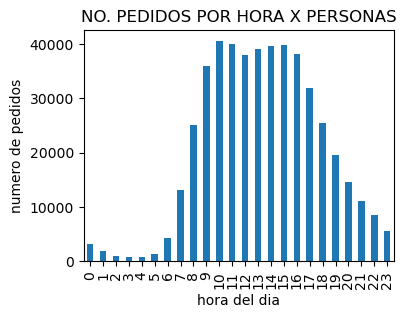

In [38]:
a2.plot(kind='bar', title='NO. PEDIDOS POR HORA X PERSONAS', x='order_hour_of_day', y='order_id',ylabel='numero de pedidos',xlabel='hora del dia',figsize=[4,3])

Las horas con mas venta son las 10 am. a las 4 pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [39]:
a3 = orders.groupby('order_dow')['order_id'].count()

<Axes: title={'center': 'DIAS DE COMPRA'}, xlabel='dias', ylabel='clientes'>

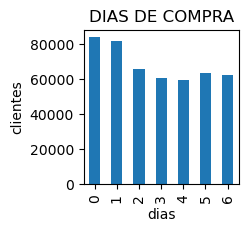

In [40]:
a3.plot(kind='bar', title='DIAS DE COMPRA', x='order_dow', y='order_id',ylabel='clientes',xlabel='dias',figsize=[2,2])

El domingo y el lunes son los dias de más registro de ventas

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [41]:
a4 = orders.groupby('days_since_prior_order')['order_id'].count()

<Axes: title={'center': 'DIAS HASTA EL PROXIMO PEDIDO'}, xlabel='dias', ylabel='id'>

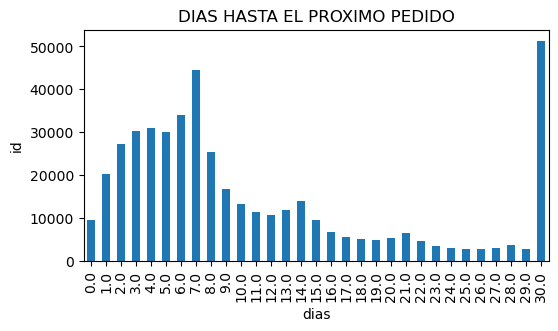

In [42]:
a4.plot(kind='bar', title='DIAS HASTA EL PROXIMO PEDIDO', x='days_since-prior_order',y='order_id',xlabel='dias', ylabel='id',figsize=[6,3])

 esto nos dice que aunque hay una buena clientela de nicho que va una vez a la semana, tambien hay muchismos clientes que solo van 1 vez al mes y podemos suponer que la afluencia de gente va en picada porque la mayoria de personas compran al inicio de mes todos sus viveres

# Requerimiento[B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
miercoles = orders[orders['order_dow'] == 3]
sabado = orders[orders['order_dow'] == 6]
print(f"Pedidos realizados el miércoles: {len(miercoles)}")
print(f"Pedidos realizados el sábado: {len(sabado)}")

Pedidos realizados el miércoles: 60912
Pedidos realizados el sábado: 62649


In [44]:
miercoles_2 = miercoles.groupby('order_hour_of_day')['order_id'].count()
sabado_2 =sabado.groupby('order_hour_of_day')['order_id'].count()



In [45]:
comparison_df = pd.DataFrame({
    'Miércoles': miercoles_2,
    'Sábados': sabado_2
}).fillna(0)

<Axes: title={'center': 'Comparación Miércoles vs Sábados - Pedidos por Hora'}, xlabel='Hora del día', ylabel='Número de pedidos'>

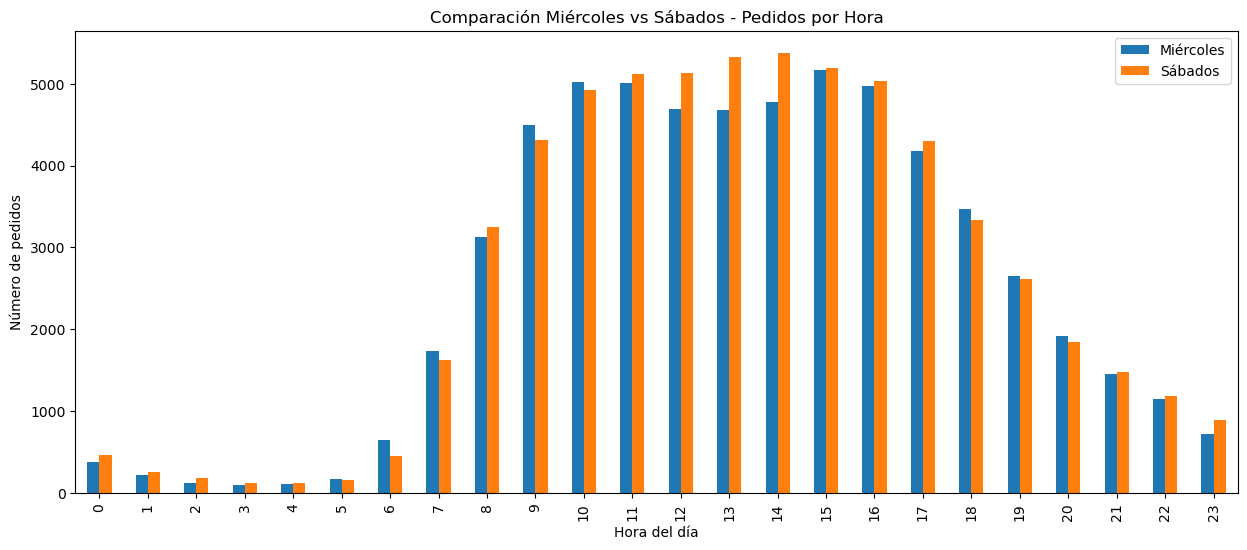

In [46]:

comparison_df.plot(kind='bar', 
                   figsize=(15, 6),
                   title='Comparación Miércoles vs Sábados - Pedidos por Hora',
                   xlabel='Hora del día',
                   ylabel='Número de pedidos')


En general podria decirse que ambos dias estan equilibardos porque aunque se pueda ver que el sabado hay más ventas, tambien los miércoles hay horas que hay mas ventas y es como si se compensara, pero sigue siendo un hecho que el sabado hay mas ventas innegablemnete.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
b2 = orders.groupby('user_id')['order_id'].count()
b2_1 = b2.value_counts().sort_index()
print(b2_1.head(10))

order_id
1     55355
2     36508
3     21548
4     13498
5      8778
6      6012
7      4240
8      3016
9      2153
10     1646
Name: count, dtype: int64


<Axes: title={'center': 'No. PEDIDOS  X CLIENTE'}, xlabel='No.Pedidos', ylabel='No.Clientes'>

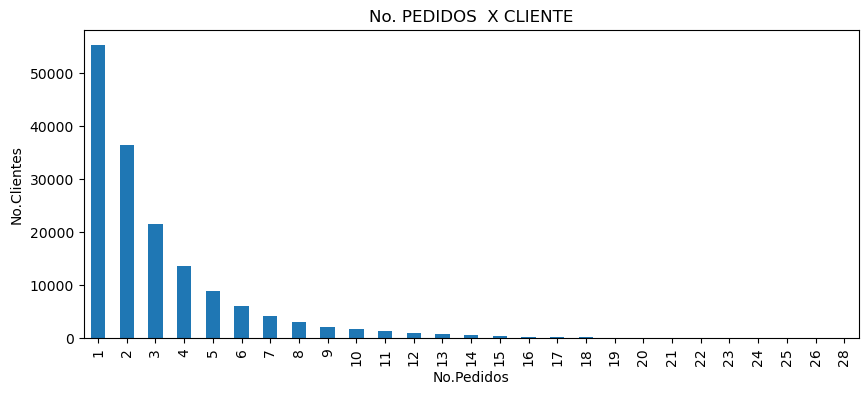

In [48]:
b2_1.plot(kind='bar',
          figsize=[10,4], 
          title='No. PEDIDOS  X CLIENTE',
          xlabel='No.Pedidos',
          ylabel='No.Clientes')

Muchas primeras compras, no mucha gente se esta quedando como cliente fiel

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
dfull = order_products.merge(orders, on=['order_id'],how='outer')
dfull = dfull.merge(products, on=['product_id'], how='outer')
dfull.head()



,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,19879.0,1.0,12.0,0.0,142388.0,7.0,3.0,5.0,15.0,Chocolate Sandwich Cookies,61.0,19.0
1,24367.0,1.0,2.0,1.0,148255.0,18.0,6.0,17.0,6.0,Chocolate Sandwich Cookies,61.0,19.0
2,24760.0,1.0,5.0,1.0,205157.0,11.0,5.0,17.0,25.0,Chocolate Sandwich Cookies,61.0,19.0
3,26490.0,1.0,14.0,1.0,92648.0,8.0,5.0,15.0,16.0,Chocolate Sandwich Cookies,61.0,19.0
4,44990.0,1.0,4.0,1.0,50150.0,17.0,5.0,17.0,5.0,Chocolate Sandwich Cookies,61.0,19.0


In [50]:
mas_vendidos = dfull.groupby('product_name')['product_id'].count().sort_values(ascending=False).head(20)
print(mas_vendidos)

product_name
Banana                      66051
Bag of Organic Bananas      53299
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29774
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19602
Organic Raspberries         19198
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14586
Organic Blueberries         13879
Cucumber Kirby              13676
Organic Fuji Apple          12544
Organic Lemon               12234
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_id, dtype: int64


<Axes: title={'center': 'TOP 20 MAS VENDIDOS'}, xlabel='nombre de productos', ylabel='No. veces comprado'>

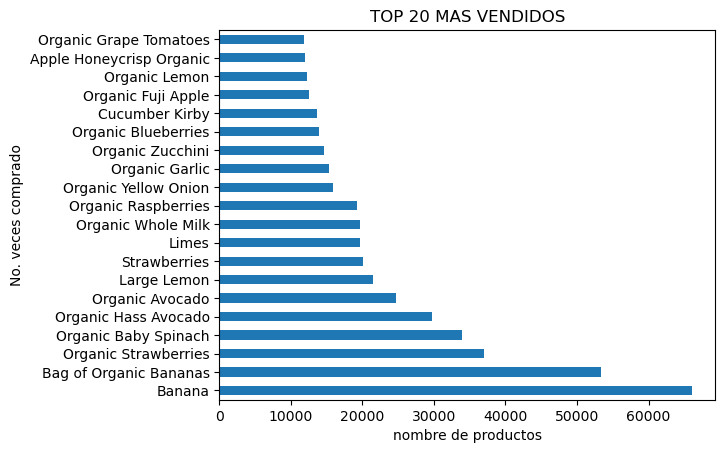

In [51]:
mas_vendidos.plot(kind='barh', title='TOP 20 MAS VENDIDOS', xlabel= 'nombre de productos', ylabel= 'No. veces comprado')

Los 20 productos mas vendidos son frutas y verduras, la mayoria 'organicas'

# Requerimientos [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
articulos_x_pedido = dfull.groupby('order_id').size()
print(articulos_x_pedido.head(10))

order_id
4.0     13
9.0     15
11.0     5
19.0     3
20.0     8
31.0    10
36.0     1
48.0     8
56.0    10
61.0    12
dtype: int64


In [53]:
print("Estadísticas de artículos por pedido:")
print(f"Promedio: {articulos_x_pedido.mean():.2f} artículos")
print(f"Mediana: {articulos_x_pedido.median():.2f} artículos")
print(f"Mínimo: {articulos_x_pedido.min()} artículos")
print(f"Máximo: {articulos_x_pedido.max()} artículos")
print(f"Desviación estándar: {articulos_x_pedido.std():.2f}")


Estadísticas de artículos por pedido:
Promedio: 9.55 artículos
Mediana: 8.00 artículos
Mínimo: 1 artículos
Máximo: 127 artículos
Desviación estándar: 7.62


<Axes: title={'center': 'Distribución del Número de Artículos por Pedido'}, xlabel='Número de artículos por pedido', ylabel='Frecuencia (número de pedidos)'>

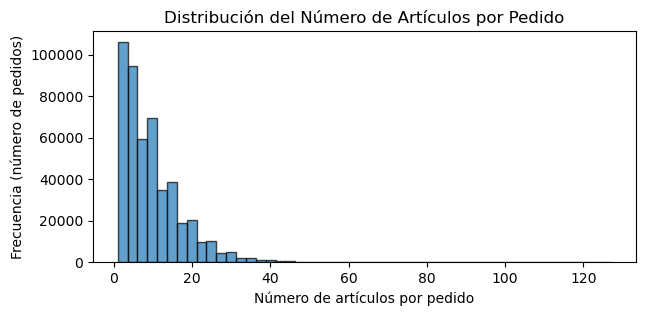

In [54]:
articulos_x_pedido.plot(figsize=[7, 3], kind='hist', bins=50, edgecolor='black', alpha=0.7, title= 'Distribución del Número de Artículos por Pedido', xlabel= 'Número de artículos por pedido', ylabel='Frecuencia (número de pedidos)')

Pese a que la frecuencia cae muy rapido, el promedio de articulos que se compran por cada cliente es de 9 a 10,viendo un pico muy alto en un principio pero disminuyendo drasticamente en cuestion de afluencia.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
c2 = dfull.groupby(['product_name'])['reordered'].sum().sort_values(ascending=False).head(20)
# print(c2)

<Axes: xlabel='Nombre y Id prod', ylabel='frecuencia de re-orden'>

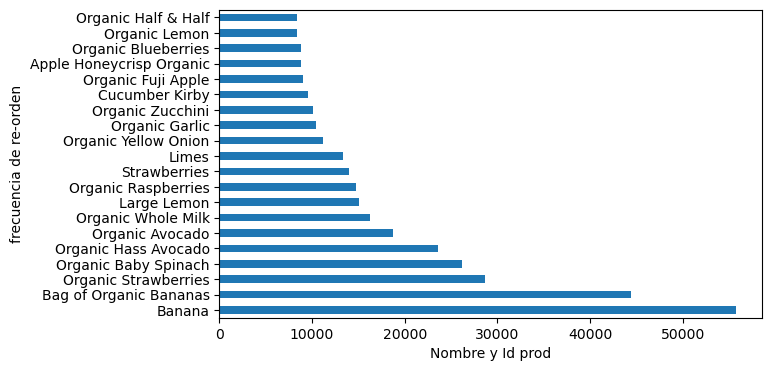

In [56]:
c2.plot(kind='barh', figsize= [7, 4], ylabel= 'frecuencia de re-orden', xlabel='Nombre y Id prod')

La mayoria de productos son comestibles perecederos, es increible la diferencia entre el primer producto y el numero 20, casi de 5 veces entre el ultimo y el primero

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
c3 = dfull.groupby(['product_name'])['reordered'].count().sort_values(ascending=False)
#print(c3)

In [58]:
c3_1 = dfull.groupby(['product_name'])['reordered'].sum().sort_values(ascending=False)
#print(c3_1)

In [59]:
c3_2 =(c3_1/c3)
c3_2.sort_values(ascending=False).head(10)


product_name
Decaf Lively Colombian Coffee K Cup                          1.0
Honey Crisp Apple Juice                                      1.0
Bonbon Bar                                                   1.0
Acne Medication Rapid Treatment Face Wash Maximum Action     1.0
Salame Panino                                                1.0
Dark Chocolate Almond Nutrition Bars                         1.0
Apricot Energy Bar                                           1.0
Core Protein-Focused Nutrition Reduced Fat Adult Dog Food    1.0
Premium Pomegranate Spread                                   1.0
Fresh Waters Freshmatic Ultra Automatic Spray Refill         1.0
Name: reordered, dtype: float64

In [60]:
c3_2.sort_values(ascending=True).head(10)

product_name
Night Cold Lemon Effervescent Tablets Multi-Symptom Relief    0.0
Honey & Lemon Alcohol Free Formula Kids Cough Syrup           0.0
Honey & Hibiscus Hair Reconstructing Shampoo                  0.0
Classic Hazelnut Flavoring Syrup                              0.0
Special K Vanilla Cappuccino Protein Breakfast Shakes         0.0
Special K Strawberry Protein Shake                            0.0
Classic Iceberg                                               0.0
Classic Italian Grated Parmesan                               0.0
Honest Soothing Bottom Wash                                   0.0
Classic Jumbo Corndogs                                        0.0
Name: reordered, dtype: float64

Con los resultados que tenemos podemos decir que los productos que más se llegan a comprar son para empezar el día como:
cafe, barras de energia, productos de skincare, bebidas, etc.
y los menos son productos muy especificos casi como si fueran productos "premium"

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
c4 = dfull.groupby(['user_id'])['reordered'].count().sort_values(ascending=False)
c4_1 = dfull.groupby(['user_id'])['reordered'].sum().sort_values(ascending=False)
c4_2 =(c4_1/c4)



In [62]:
c4_2.reset_index().describe()

,user_id,reordered
count,157437.000000,149626.000000
mean,103173.817953,0.494853
std,59547.633913,0.292685
min,2.000000,0.000000
25%,51634.000000,0.272727
50%,103120.000000,0.500000
75%,154768.000000,0.724138
max,206209.000000,1.000000


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
c5 = dfull[dfull['add_to_cart_order'] == 1].groupby(['product_name'])['reordered'].count().sort_values(ascending=False).head(20)

<Axes: xlabel='Nombre prod', ylabel='Articulos que se ponen de primeras'>

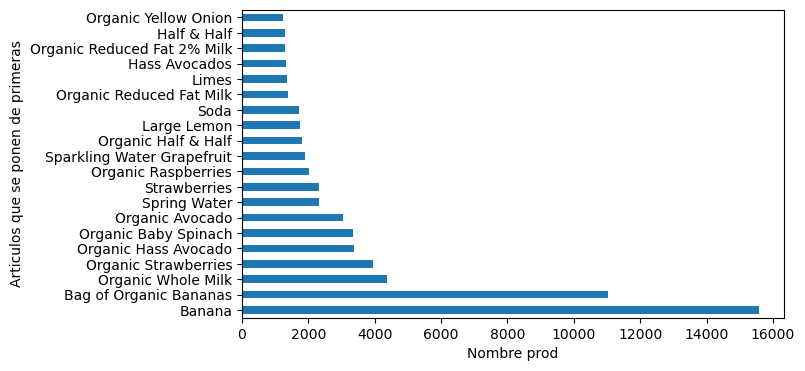

In [64]:
c5.plot(kind='barh', figsize= [7, 4], ylabel= 'Articulos que se ponen de primeras', xlabel='Nombre prod')

Los productos que la gente mas pone en su carrito son los productos 'Organicos'.

### Conclusion general del proyecto:

En esta tienda lo más comprado son las frutas , seria buena opcion talvez reemplazar algunos productos que rara vez se compran por unos que ya hay en existencia y se consuman mas o probar a vender algo de la categoria que sea relacionado con los mas vendidos, frutas exoticas y ver como va evolucionando eso. tambien a algunos articulos hacerles más difución o poner ofertas con los que no se venden tanto.

